### Customer Personality Analysis
- Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
- Requirement: Clustering to summarize customer segment
-> Modify products according to the specific needs, behaviors and concerns of different types of customers.

- Method using: RFM (Recency, Frequency, Monetaty)
- Step: 
    + Prepare (Cleaning + feature classification)
    + EDA (Exploratory Data Analysis)
    + RFM calculation
    + Recommendations

# Import library

In [53]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Import dataset
customer_df = pd.read_csv(r'C:\Users\thuy.nguyen\OneDrive - FiinGroup JSC\Desktop\dataset\Customer Personality Analysis\marketing_campaign.csv', delimiter= "\t", index_col=1)

In [55]:
# Drop unnecessary column -> add no value to dataset (all rows have the same results)
customer_df.drop('Z_CostContact', axis = 1, inplace = True)
customer_df.drop('Z_Revenue', axis = 1, inplace = True)

In [56]:
# Year_birth currently is index -> reset index
customer_df = customer_df.reset_index()

In [57]:
# change datetime of Dt_Customer
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], dayfirst=True)

### Feature classification

In [58]:
# ['Education', 'Marital_Status'] is categorical

customer_df['Education'] = customer_df['Education'].astype('category')
customer_df['Marital_Status'] = customer_df['Marital_Status'].astype('category')
customer_df['Complain'] = customer_df['Complain'].astype('int64')

In [59]:
# Categorize Education
customer_df['Education'] = customer_df['Education'].replace({"Basic":"Basic"
                                                             ,"2n Cycle":"Undergraduate"
                                                             , "Graduation":"Undergraduate"
                                                             , "Master":"Postgraduate"
                                                             , "PhD":"Postgraduate"})

In [60]:
# Categorize Marital status
customer_df['Marital_Status'] = customer_df['Marital_Status'].replace({'Absurd' : 'Single'
                                                                       , 'Alone' : 'Single'
                                                                       , 'Divorced' : 'Single'
                                                                       , 'Married' : 'Together'
                                                                       , 'Single' : 'Single'
                                                                       , 'Together' : 'Together'
                                                                       , 'Widow' : 'Single'
                                                                       , 'YOLO' : 'Single'})

In [61]:
# Rename column for a right meaning
customer_df = customer_df.rename(columns={'Response': 'AcceptedCmp6'})

In [62]:
# Classify age to generation  (may have same characteristics)

# 1925-1945: Silent Gen
# 1946-1964: Baby Boomer
# 1965 - 1979: Gen X
# 1980 - 1994: Gen Y
# 1995 - 2012:  Gen Z

def get_generation(year):
    if year <= 1945:
        return 'Silent Gen'
    if year > 1945 and year <= 1964:
        return 'Baby Boomer'
    if year > 1964 and year <= 1979:
        return 'Gen X'
    if year > 1979 and year <= 1994:
        return 'Gen Y'
    if year > 1994:
        return 'Gen Z'
    
customer_df['Generation'] = customer_df['Year_Birth'].apply(get_generation)
customer_df['Generation'] = customer_df['Generation'].astype('category')


In [63]:
# create total spend
customer_df['Total_Spend'] = customer_df['MntFishProducts'] + customer_df['MntFruits'] + customer_df['MntGoldProds'] + customer_df['MntMeatProducts'] + customer_df['MntSweetProducts'] + customer_df['MntWines']

# create total accept promotion
customer_df['Total_Accepted'] = customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] + customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] + customer_df['AcceptedCmp5'] + customer_df['AcceptedCmp6']

# create total purchase place
customer_df['Total_Place'] = customer_df['NumCatalogPurchases'] + customer_df['NumStorePurchases'] + customer_df['NumWebPurchases']


In [64]:
# Create new columns based on current

# Count age
current_year = customer_df['Dt_Customer'].max().year
customer_df['Age'] = customer_df['Year_Birth'].apply(lambda x: current_year - x)

# create total children column = Kidhome + Teenhome
customer_df['#Children'] = customer_df['Kidhome'] + customer_df['Teenhome']

# create parent column
customer_df['Parental_Status'] = customer_df['#Children'].apply(lambda x: 1 if x != 0 else 0)

# create total number of family member
customer_df['#Family_Member'] = customer_df['#Children'] + 1
customer_df.loc[customer_df['Marital_Status'] == 'Married', '#Family_Member'] = customer_df['#Children'] + 2

# create bucket/income
customer_df['Spend/Income(%)'] = (customer_df['Total_Spend']*100/ customer_df['Income']).round(2)

In [65]:
customer_df['#Family_Member'] = customer_df['#Family_Member'].astype('category')

In [66]:
# change Parental_Status (int64) -> category
customer_df['Parental_Status'] = customer_df['Parental_Status'].astype('category')

In [67]:
customer_df["Dt_Customer"] = pd.to_datetime(customer_df["Dt_Customer"])
dates = []
for i in customer_df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


# EDA - Exploratory Data Analysis

#### Eliminate outlier

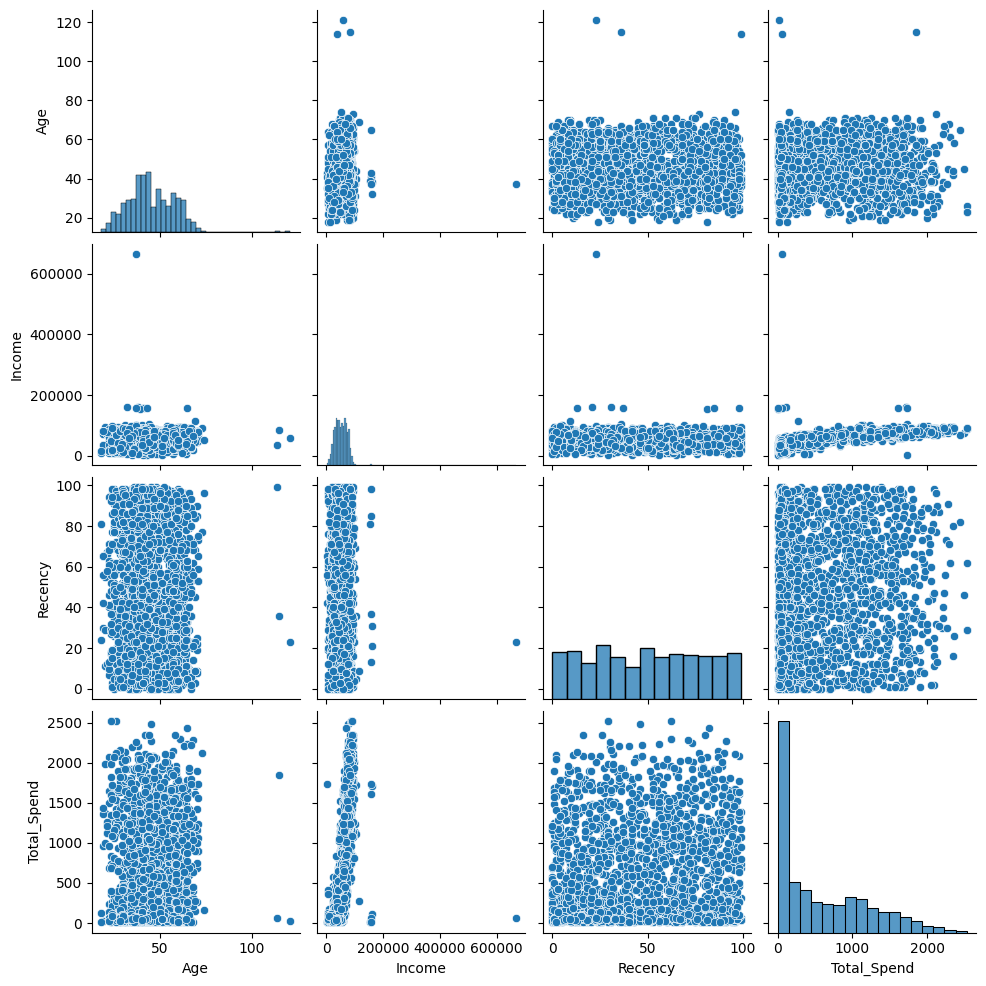

In [68]:
# Select numeric columns to visualize outliers

sns.color_palette('Paired')
columns_to_plot = ['Age', 'Income', 'Recency', 'Total_Spend']
sns.pairplot(customer_df[columns_to_plot]);

In [69]:
# Age and income have outliers (age > 100 and income > 600000) -> eliminate outliers

customer_df = customer_df.drop(customer_df[customer_df['Age'] > 90].index)
customer_df = customer_df.drop(customer_df[customer_df['Income'] > 600000].index)

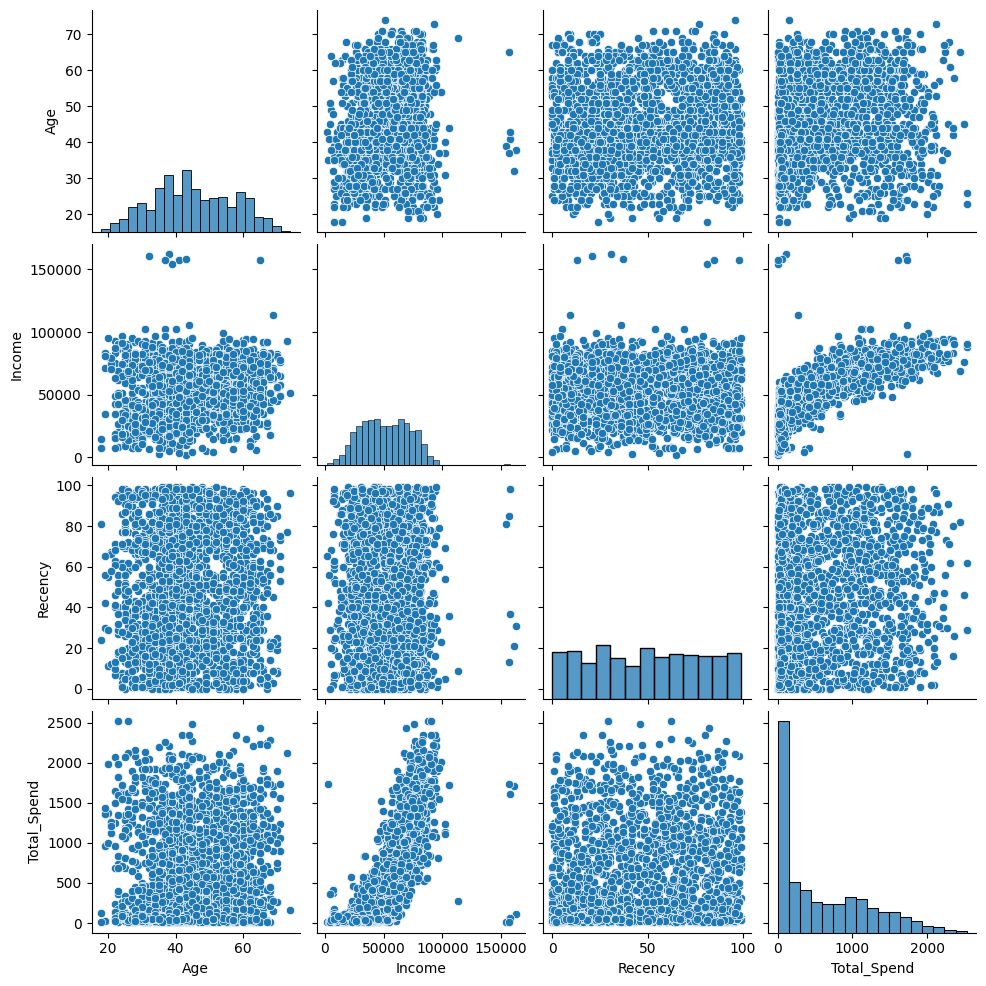

In [70]:
# Select numeric columns to visualize outliers

sns.color_palette('Paired')
columns_to_plot = ['Age', 'Income', 'Recency', 'Total_Spend']
sns.pairplot(customer_df[columns_to_plot]);

,Year_Birth,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp6,Generation,Total_Spend,Total_Accepted,Total_Place,Age,#Children,Parental_Status,#Family_Member,Spend/Income(%)
164,1973,8475,Postgraduate,Together,157243.0,0,1,2014-03-01,98,20,...,0,Gen X,1608,0,22,41,1,1,2,1.02
617,1976,1503,Postgraduate,Together,162397.0,1,1,2013-06-03,31,85,...,0,Gen X,107,0,1,38,2,1,3,0.07
655,1975,5555,Undergraduate,Single,153924.0,0,0,2014-02-07,81,1,...,0,Gen X,6,0,0,39,0,0,1,0.00
687,1982,1501,Postgraduate,Together,160803.0,0,0,2012-08-04,21,55,...,0,Gen Y,1717,0,29,32,0,0,1,1.07
1300,1971,5336,Postgraduate,Together,157733.0,1,0,2013-06-04,37,39,...,0,Gen X,59,0,2,43,1,1,2,0.04
1653,1977,4931,Undergraduate,Together,157146.0,0,0,2013-04-29,13,1,...,0,Gen X,1730,0,28,37,0,0,1,1.10
2132,1949,11181,Postgraduate,Together,156924.0,0,0,2013-08-29,85,2,...,0,Baby Boomer,8,0,0,65,0,0,1,0.01


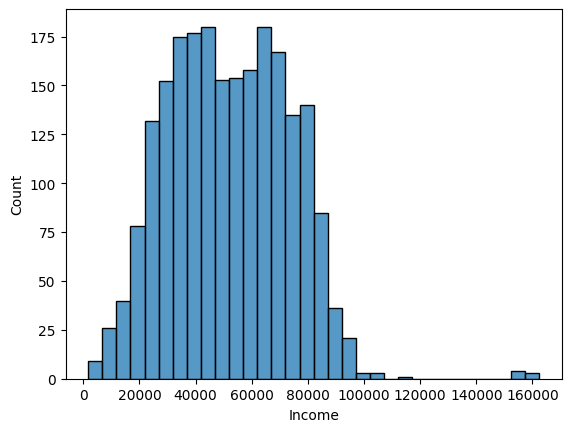

In [71]:
# Check outlier of income
sns.histplot(data = customer_df
             , x = 'Income')

customer_df[customer_df['Income'] > 140000]

#### Fill missing value (Income)
- Group by Education and Marital_Status

In [72]:
# Get a boolean mask of the rows that have at least one null value
null_income = customer_df.isnull().any(axis=1) #xác định các dòng có ít nhất một giá trị null

# Get the rows with at least one null value
null_rows = customer_df.loc[null_income] # loc[] -> lấy ra các dòng tương ứng với các giá trị True trong bảng boolean

# Display the null rows
print(null_rows)

      Year_Birth     ID      Education Marital_Status  Income  Kidhome  \
10          1983   1994  Undergraduate       Together     NaN        1   
27          1986   5255  Undergraduate         Single     NaN        1   
43          1959   7281   Postgraduate         Single     NaN        0   
48          1951   7244  Undergraduate         Single     NaN        2   
58          1982   8557  Undergraduate         Single     NaN        1   
71          1973  10629  Undergraduate       Together     NaN        1   
90          1957   8996   Postgraduate       Together     NaN        2   
91          1957   9235  Undergraduate         Single     NaN        1   
92          1973   5798   Postgraduate       Together     NaN        0   
128         1961   8268   Postgraduate       Together     NaN        0   
133         1963   1295  Undergraduate       Together     NaN        0   
312         1989   2437  Undergraduate       Together     NaN        0   
319         1970   2863  Undergraduate

In [73]:
Income = customer_df.groupby(['Education', 'Marital_Status']).median()['Income']
Income

C:\Users\thuy.nguyen\AppData\Local\Temp\ipykernel_9524\3432016210.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Income = customer_df.groupby(['Education', 'Marital_Status']).median()['Income']


Education      Marital_Status
Undergraduate  Single            51898.0
               Together          50725.0
Basic          Single            16383.0
               Together          23179.0
Postgraduate   Single            51470.0
               Together          54730.0
Name: Income, dtype: float64

In [74]:
# Filling the missing value in Age with the medians of Sex and Pclass groups

customer_df['Income'] = customer_df.groupby(['Education', 'Marital_Status'])['Income'].apply(lambda x: x.fillna(x.median()));
# x ~ Income cols have same ['Education', 'Marital_Status']

C:\Users\thuy.nguyen\AppData\Local\Temp\ipykernel_9524\3257383165.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  customer_df['Income'] = customer_df.groupby(['Education', 'Marital_Status'])['Income'].apply(lambda x: x.fillna(x.median()));


## Check Demographics

### Check distribution of `Education`, `Marital_Status`, `Generation`,`Parental_Status` vs `Income`, `Total_Spend`

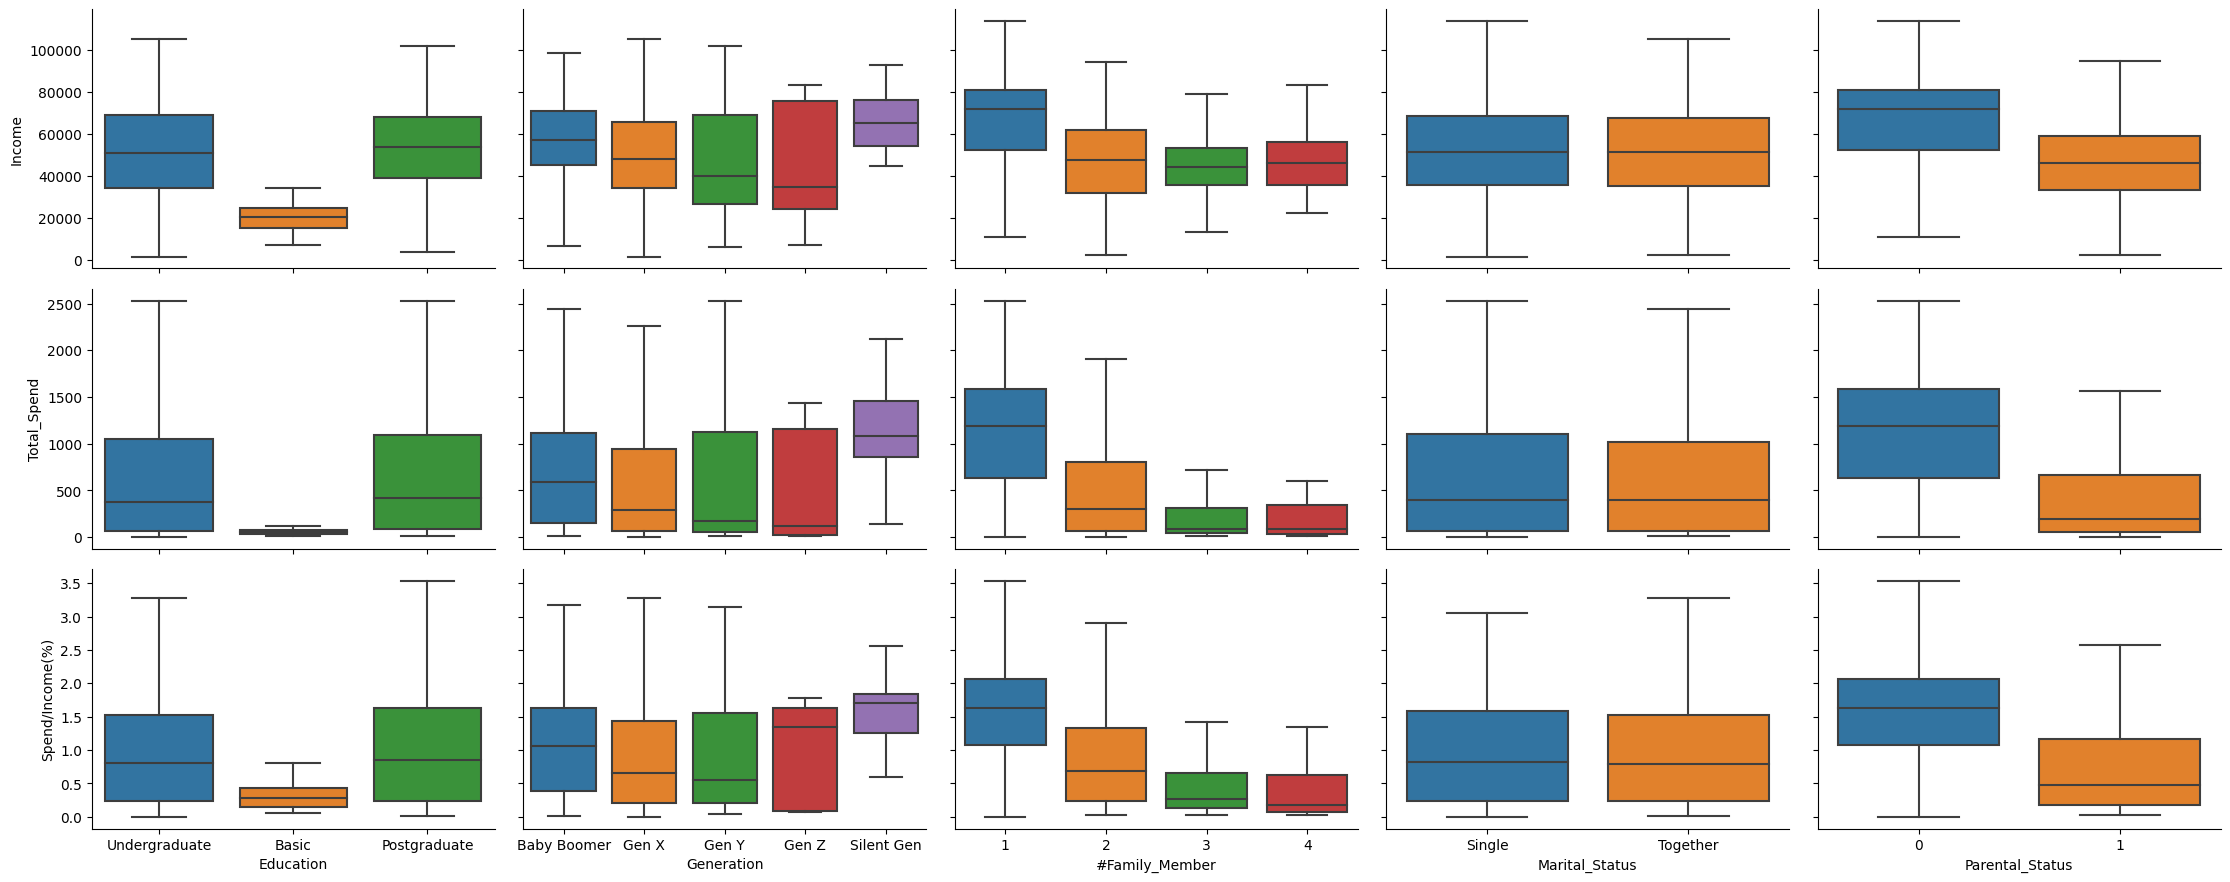

In [75]:
num = ['Income', 'Total_Spend','Spend/Income(%)'] #col
cat = ['Education', 'Generation', '#Family_Member', 'Marital_Status','Parental_Status'] #row

def num_cat(data, cat, num):
# Create the PairGrid
    g = sns.PairGrid(data=customer_df,
                     y_vars=num,
                     x_vars=cat,
                     height=3,
                     aspect=1.5)

    # Draw a seaborn bar onto each Axes
    g.map(sns.boxplot,showfliers=False)

num_cat(customer_df, cat, num)


- Basic education level has the lower income compared to the remaining
- Undergraduation: 2n Cycle and graduate have a larger range of income

-> spending value based on income?

-> product type to meet maslow demand?

- The income range of each generation has widened, but the median income has decreased progressively by generation.

Whether purchase behavior (product type, buying place) may different among generation?

Suprisingly, that parental status = 0 have better income than people with children.

The majority of no-child people's income is near 80000 while the median of people with child is lower than the 1st quartile of no-child group.


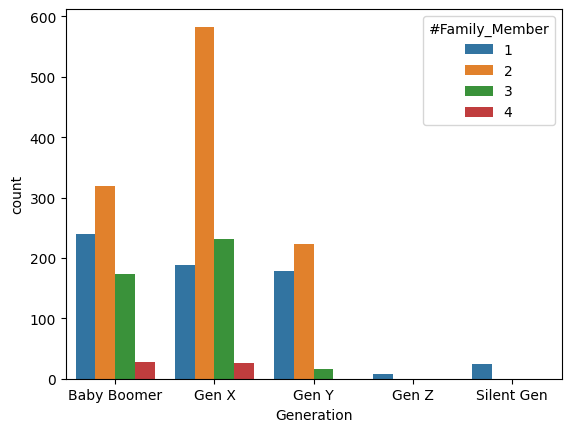

In [76]:
sns.countplot(data=customer_df, x='Generation', hue='#Family_Member');

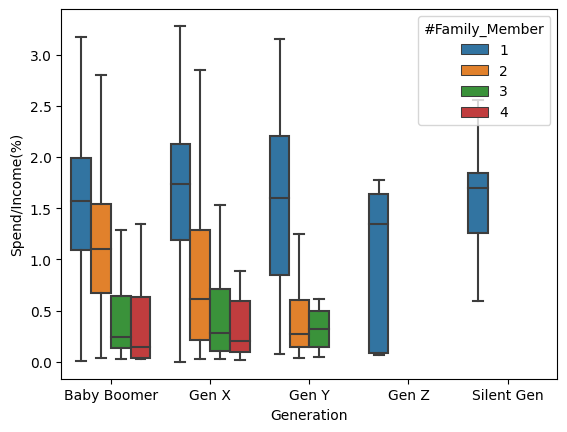

In [77]:
#

sns.boxplot(data=customer_df, x='Generation', y='Spend/Income(%)' , hue='#Family_Member',showfliers=False);

I focus on analysing Baby Boomer, Gen X and Gen Y due to the large quantity
- Undergraduate and Postgraduate have a same characteristics in spending and income
- The median about monetary feature of 3 generation was lower as the age
- People stayed single spennding more money (~1.6% spending/income) then 2 family members (single + 1 child or couple)

- People having 1-2 children had tendency spending ~ 0.5% spending/income on basic living requirement

In [78]:
customer_df['Parental_Status'].value_counts()

1    1599
0     637
Name: Parental_Status, dtype: int64

In [125]:
# customer_df.groupby('Generation').sum()

sum = customer_df.loc[:, ['Generation', 'Total_Spend', 'Income' , 'Total_Accepted', '#Family_Member']]
b = sum.groupby('Generation').sum()
b['Avg'] = (b['Total_Spend']*100/b['Income']).round(2)
Count =[24, 759, 1029, 417, 7] #count of #generation

b['Count'] = Count
b['Avg_Spend'] = (b['Total_Spend']/b['Count']).round(2)
b['Avg_Income'] = (b['Income']/b['Count']).round(2)

med = sum.groupby('Generation').median()

b

C:\Users\thuy.nguyen\AppData\Local\Temp\ipykernel_9524\2003071218.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b = sum.groupby('Generation').sum()
C:\Users\thuy.nguyen\AppData\Local\Temp\ipykernel_9524\2003071218.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med = sum.groupby('Generation').median()


,Total_Spend,Income,Total_Accepted,Avg,Count,Avg_Spend,Avg_Income
Generation,,,,,,,
Baby Boomer,530428,43223997.0,345,1.23,24,22101.17,1800999.88
Gen X,556082,51469377.0,400,1.08,759,732.65,67812.09
Gen Y,238708,19570864.0,233,1.22,1029,231.98,19019.30
Gen Z,3944,326606.0,5,1.21,417,9.46,783.23
Silent Gen,25824,1597926.0,17,1.62,7,3689.14,228275.14


## Check Behavioral segmentation

### Check loại thực phẩm được mua nhiều

In [80]:
products = ['MntFruits', 'MntWines','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

# Calc number of each product
products = pd.DataFrame(customer_df[products].sum().sort_values(ascending=False))

products

,0
MntWines,680029
MntMeatProducts,373375
MntGoldProds,98346
MntFishProducts,83931
MntSweetProducts,60552
MntFruits,58753


Wine and meat are bought mostly (#wine = 2 times meats)

In [81]:
# check quantitatives of viz below
customer_df[customer_df['Education'] == 'Basic'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 11 to 2208
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           54 non-null     int64         
 1   ID                   54 non-null     int64         
 2   Education            54 non-null     category      
 3   Marital_Status       54 non-null     category      
 4   Income               54 non-null     float64       
 5   Kidhome              54 non-null     int64         
 6   Teenhome             54 non-null     int64         
 7   Dt_Customer          54 non-null     datetime64[ns]
 8   Recency              54 non-null     int64         
 9   MntWines             54 non-null     int64         
 10  MntFruits            54 non-null     int64         
 11  MntMeatProducts      54 non-null     int64         
 12  MntFishProducts      54 non-null     int64         
 13  MntSweetProducts     54 non-null  

In [82]:
#Group row and col
rows = ['Education', 'Generation', 'Marital_Status','Parental_Status', '#Family_Member']
cols = ['MntFruits', 'MntWines','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

In [83]:
# Group the data by the row variable and calculate the sum for each column
sum_product_df = customer_df.groupby(rows)[cols].sum('sum').reset_index()
sum_product_df.head()

,Education,Generation,Marital_Status,Parental_Status,#Family_Member,MntFruits,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Undergraduate,Baby Boomer,Single,0,1,2406,25663,20979,4045,3336,3903
1,Undergraduate,Baby Boomer,Single,0,2,0,0,0,0,0,0
2,Undergraduate,Baby Boomer,Single,0,3,0,0,0,0,0,0
3,Undergraduate,Baby Boomer,Single,0,4,0,0,0,0,0,0
4,Undergraduate,Baby Boomer,Single,1,1,0,0,0,0,0,0


In [84]:
# Create function to shorten code
def create_barplot_with_annotations(data, cols, rows, order = None):
# Create the PairGrid
    g = sns.PairGrid(data=sum_product_df,
                     y_vars=cols,
                     x_vars=rows,
                     height=3,
                     aspect=1)

    # Draw a seaborn bar onto each Axes
    g.map(sns.barplot, errorbar = None, order = order)

    # Add data labels to the barplot
    for i, col in enumerate(cols):
        for j, row in enumerate(rows):
            ax = g.axes[i, j]   # Axes object is a subplot in a grid
            for patch in ax.patches:   # Access the patches using the patches attribute of the Axes object.  => manipulate the appearance of the patches
                width, height = patch.get_width(), patch.get_height()
                x, y = patch.get_xy()  # a method in Matplotlib, which is the underlying library used by Seaborn for visualization => returns the coordinates of the lower-left corner
                ax.annotate(f"{width:.0f}", (x + width/3, y + height/1.8), fontsize=10)
                ax.set_xlabel(row, fontsize=10)


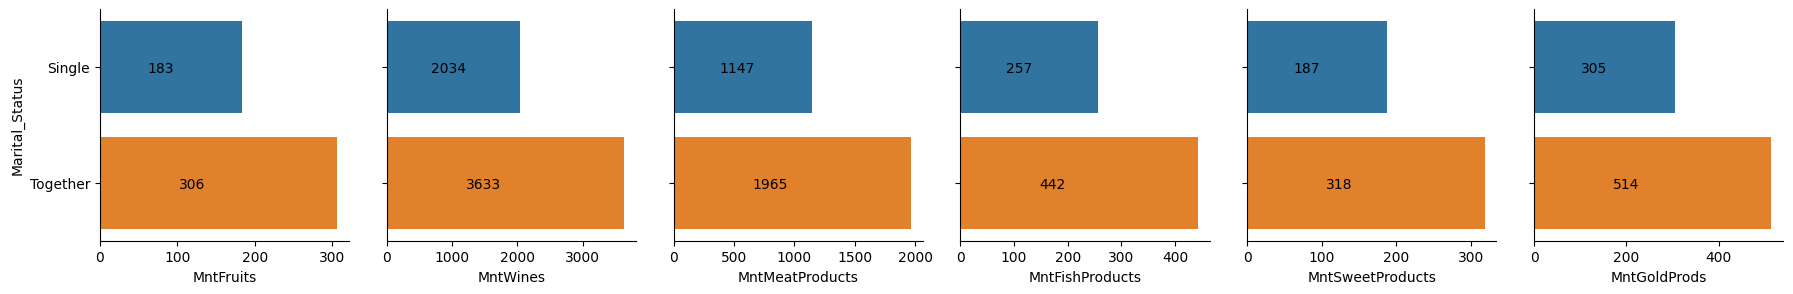

In [85]:
# Group the data by Generation and calculate the sum of each product
sum_df = customer_df.groupby('Marital_Status')[['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Define the rows and columns for the PairGrid
rows = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols = ['Marital_Status']

create_barplot_with_annotations(sum_df, cols, rows)

Overall, together spent around 2 times more than single

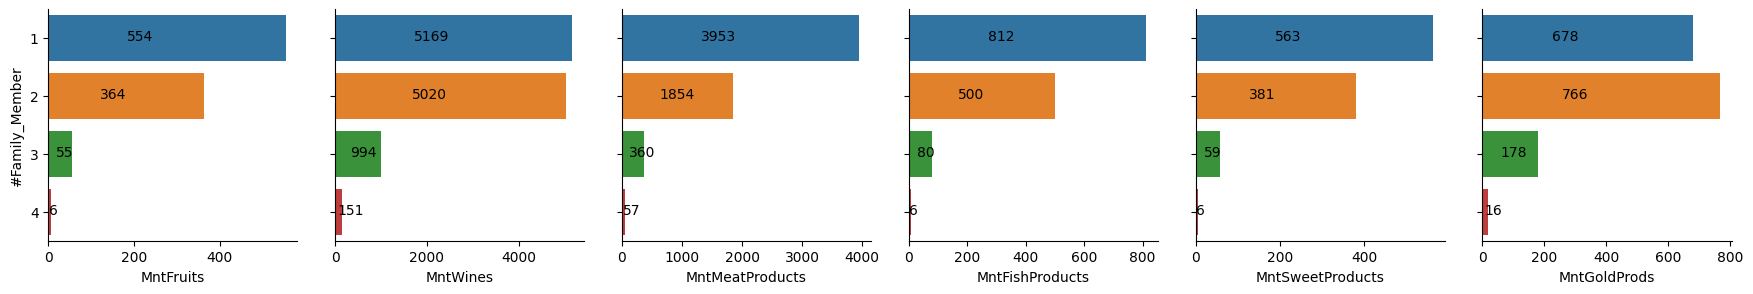

In [86]:
# Group the data by Generation and calculate the sum of each product
sum_df = customer_df.groupby('#Family_Member')[['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Define the rows and columns for the PairGrid
rows = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols = ['#Family_Member']

create_barplot_with_annotations(sum_df, cols, rows)

People having children bought Wines and Gold more than the remaining.
- Large wine spending was due to a price of wine, not reflecting the number of buying

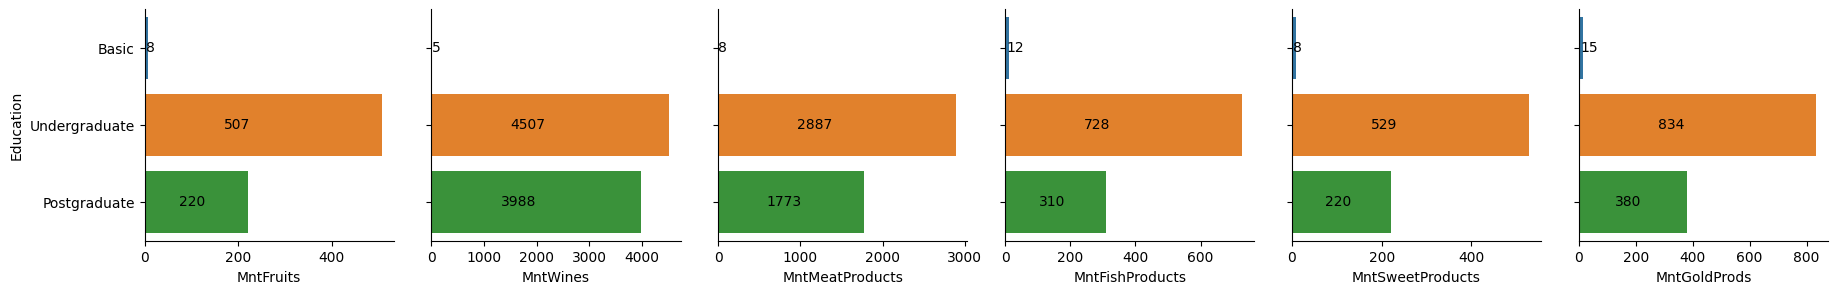

In [87]:
# Group the data by Generation and calculate the sum of each product
sum_df = customer_df.groupby("Education")[['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Define the rows and columns for the PairGrid
rows = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols = ['Education']
order = ['Basic', 'Undergraduate', 'Postgraduate']

create_barplot_with_annotations(sum_df, cols, rows, order = order)


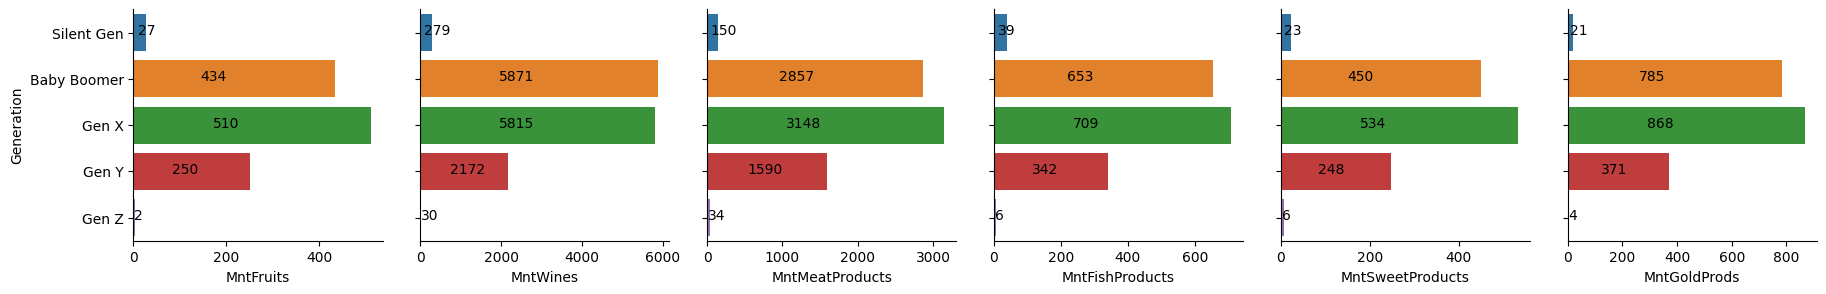

In [88]:
# Group the data by Generation and calculate the sum of each product
sum_df = customer_df.groupby('Generation')[['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Define the rows and columns for the PairGrid
rows = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols = ['Generation']
order = ['Silent Gen', 'Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z']

create_barplot_with_annotations(sum_df, cols, rows, order=order)

- Overall, the main customers of the shop is Baby Boomer, Gen X and Gen Y who graduate university and have experience further education. 

- The number of Silent Gen and Gen Z visiting store is small because they might be dependent to other members in their family OR store's location OR the resident demography around the store

In [89]:
customer_df['Year_Birth'].describe()

count    2236.000000
mean     1968.898032
std        11.703281
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### Check place

In [90]:
customer_df.columns

Index(['Year_Birth', 'ID', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Generation', 'Total_Spend',
       'Total_Accepted', 'Total_Place', 'Age', '#Children', 'Parental_Status',
       '#Family_Member', 'Spend/Income(%)'],
      dtype='object')

In [91]:
place = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']

# Calc number of each product
place = pd.DataFrame(customer_df[place].sum().sort_values(ascending=False))

place

,0
NumStorePurchases,12959
NumWebVisitsMonth,11893
NumWebPurchases,9140
NumCatalogPurchases,5955


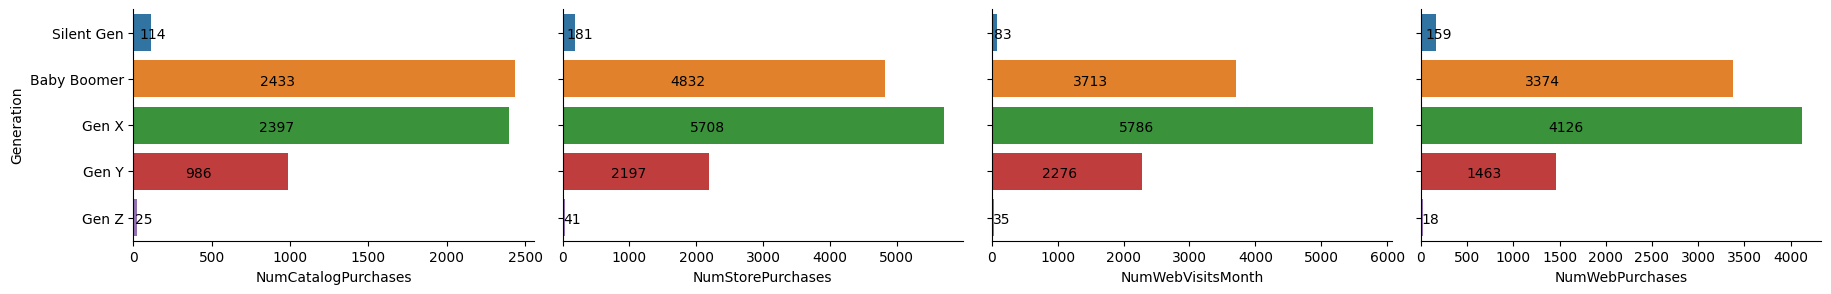

In [92]:
# Define the rows and columns for the PairGrid
rows = ['NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','NumWebPurchases']
cols = ['Generation']
order = ['Silent Gen', 'Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z']

# Group the data by the row variable and calculate the sum for each column
sum_place_df = customer_df.groupby('Generation')[['NumCatalogPurchases', 'NumStorePurchases','NumWebPurchases','NumWebVisitsMonth']].sum().reset_index()

# Create the PairGrid
g = sns.PairGrid(data=sum_place_df,
                 y_vars=cols,
                 x_vars=rows,
                 height=3,
                 aspect=1.5)

# Draw a seaborn bar onto each Axes
g.map(sns.barplot, errorbar = None, order = order)

# Add data labels to the barplot
for i, col in enumerate(cols):
    for j, row in enumerate(rows):
        ax = g.axes[i, j]
        for patch in ax.patches:
            width, height = patch.get_width(), patch.get_height()
            x, y = patch.get_xy()
            ax.annotate(f"{width:.0f}", (x + width/3, y + height/1.5), fontsize=10)
            ax.set_xlabel(row, fontsize=10)

Overall, the order of purchase place across generation is Store - Web - Catalog

1. It seems like they purchase as a habit when choosing traditional method to buy OR the location of supermarket is convenient to pick up or buy products

2. The conversion from #webvisit -> #webpurchase is high through 4 generations. They might visit web to check promotion, price before making a decision. For Silent Gen only, they went to web for purchase directly instead of visiting then check out compared to other generation.

3.  The catalog purchase is the lowest number, and the main audience to purchase is Baby Boomer while other channels are Gen X.

### Check promotion

In [93]:
customer_df.columns

Index(['Year_Birth', 'ID', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Generation', 'Total_Spend',
       'Total_Accepted', 'Total_Place', 'Age', '#Children', 'Parental_Status',
       '#Family_Member', 'Spend/Income(%)'],
      dtype='object')

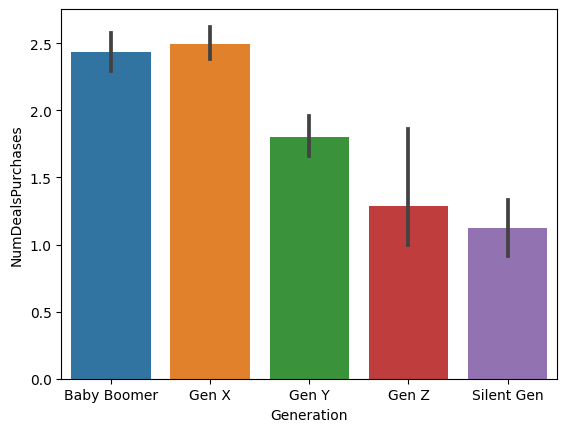

In [94]:
# NumDeal vs Generation

aha = sns.barplot(data = customer_df, x = 'Generation', y = 'NumDealsPurchases')

In [95]:
promotion = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'AcceptedCmp6']

# Calc number of each product
promotion = pd.DataFrame(customer_df[promotion].sum().sort_values(ascending=False))

promotion

,0
AcceptedCmp6,334
AcceptedCmp4,167
AcceptedCmp3,163
AcceptedCmp5,162
AcceptedCmp1,144
AcceptedCmp2,30
Complain,20


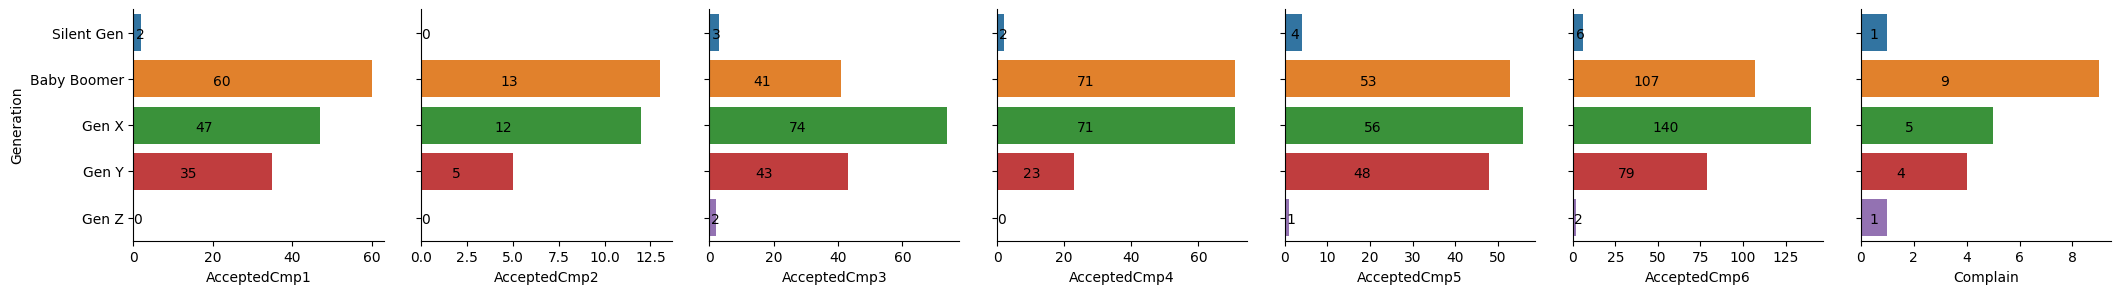

In [96]:
# Define the rows and columns for the PairGrid
rows = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp6', 'Complain']
cols = ['Generation']
order = ['Silent Gen', 'Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z']

# Group the data by the row variable and calculate the sum for each column
sum_place_df = customer_df.groupby('Generation')[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'AcceptedCmp6']].sum().reset_index()

# Create the PairGrid
g = sns.PairGrid(data=sum_place_df,
                 y_vars=cols,
                 x_vars=rows,
                 height=3,
                 aspect=1)

# Draw a seaborn bar onto each Axes
g.map(sns.barplot, errorbar = None, order = order)

# Add data labels to the barplot
for i, col in enumerate(cols):
    for j, row in enumerate(rows):
        ax = g.axes[i, j]
        for patch in ax.patches:
            width, height = patch.get_width(), patch.get_height()
            x, y = patch.get_xy()
            ax.annotate(f"{width:.0f}", (x + width/3, y + height/1.5), fontsize=10)
            ax.set_xlabel(row, fontsize=10)

Apparently, among 5 promotion phases, Promotion 2 is the least efficient and Promotion 6 is the best.

Promotion 3,4,5,6 seems more appealing to Gen X -> if Marketing manager plan to focus on Gen X -> execute promotion following concept of those types.

Baby Boomer have the most complain to other generation

## Customer segmentation by RFM

In [97]:
customer_df['Frequency'] = customer_df['Total_Place']
customer_df['Monetary'] = customer_df['Total_Spend']

In [98]:
# create RFM_score dataframe 

def RFM_score(dataframe):
    dataframe["Recency_score"] = pd.qcut(dataframe["Recency"], 5, labels=[5,4,3,2,1])
    dataframe["Frequency_score"] = pd.qcut(dataframe["Frequency"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["Monetary_score"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["RFM_score"] = dataframe["Recency_score"].astype(str) + dataframe["Frequency_score"].astype(str) + dataframe["Monetary_score"].astype(str)
    return dataframe

RFM_score(customer_df).head()

,Year_Birth,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,#Children,Parental_Status,#Family_Member,Spend/Income(%),Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score
0,1957,5524,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,2.78,22,1617,3,5,5,355
1,1954,2174,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,3,0.06,4,27,4,1,1,411
2,1965,4141,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,1,1.08,20,776,4,4,4,444
3,1984,6182,Undergraduate,Together,26646.0,1,0,2014-02-10,26,11,...,1,1,2,0.20,6,53,4,2,1,421
4,1981,5324,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,...,1,1,2,0.72,14,422,1,3,3,133


In [99]:
def map_rfm_score_to_type(RFM_score):
    rfm_type = ""
    if RFM_score in ['555','554','544','545','454','455','445']:
        rfm_type = "Champions (1)"
    elif RFM_score in ['543','444','435','355','354','345','344','335']:
        rfm_type ="Loyal Customers (2)"
    elif RFM_score in ['553','551',  '552',  '541',  '542',  '533',  '532',  '531',  '452',  '451',  '442',  '441',  '431',  '453',  '433',  '432',  '423',  '353',  '352',  '351',  '342',  '341',  '333',  '323']:
        rfm_type ="Potential Loyalist (3)" 
    elif RFM_score in ['512','511','422','421','412','411','311']:
        rfm_type ="New Customers (4)"
    elif RFM_score in ['525','524',  '523',  '522',  '521',  '515',  '514',  '513',  '425',  '424',  '413',  '414',  '415',  '315',  '314',  '313']:
        rfm_type ="Promising (5)"
    elif RFM_score in ['535','534','443','434','343','334','325','324']:
        rfm_type = "Need Attention (6)"
    elif RFM_score in ['155','154','144','214','215','115','114','113']:
        rfm_type ="Cannot Lose Them (7)"
    elif RFM_score in ['331','321','312','221','213']:
        rfm_type ="About To Sleep (8)"
    elif RFM_score in ['255','254','245','244','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124']:
        rfm_type ="At Risk (9)"
    elif RFM_score in ['332','322','231','241',  '251',  '233',  '232',  '223',  '222',  '132',  '123',  '122','212','211']:
        rfm_type ="Hibernating (10)"
    elif RFM_score in ['111','112',  '121','131','141','151']:
        rfm_type ="Lost (11)"
    return rfm_type

In [100]:
customer_df['RFM_type'] = customer_df['RFM_score'].apply(map_rfm_score_to_type)

In [101]:
customer_df[["RFM_type", "Recency", "Frequency", "Monetary"]].groupby("RFM_type").agg(["mean", "count"])

Recency        Frequency           Monetary      
                             mean count       mean count         mean count
RFM_type                                                                   
About To Sleep (8)      55.600000    35   5.485714    35    60.085714    35
At Risk (9)             77.030120   332  17.295181   332  1074.322289   332
Cannot Lose Them (7)    89.162602   123  21.658537   123  1183.650407   123
Champions (1)           17.852713   258  21.356589   258  1291.329457   258
Hibernating (10)        69.909574   376   7.101064   376   145.063830   376
Lost (11)               89.052174   115   4.382609   115    42.469565   115
Loyal Customers (2)     42.346667   225  19.608889   225  1155.271111   225
Need Attention (6)      30.417476   103  15.009709   103   903.223301   103
New Customers (4)       28.287234   376   4.468085   376    50.938830   376
Potential Loyalist (3)  29.019231   208  12.346154   208   355.495192   208
Promising (5)           10.247059    85   6.658824    85   140.752941    85

<Figure size 2000x800 with 0 Axes>

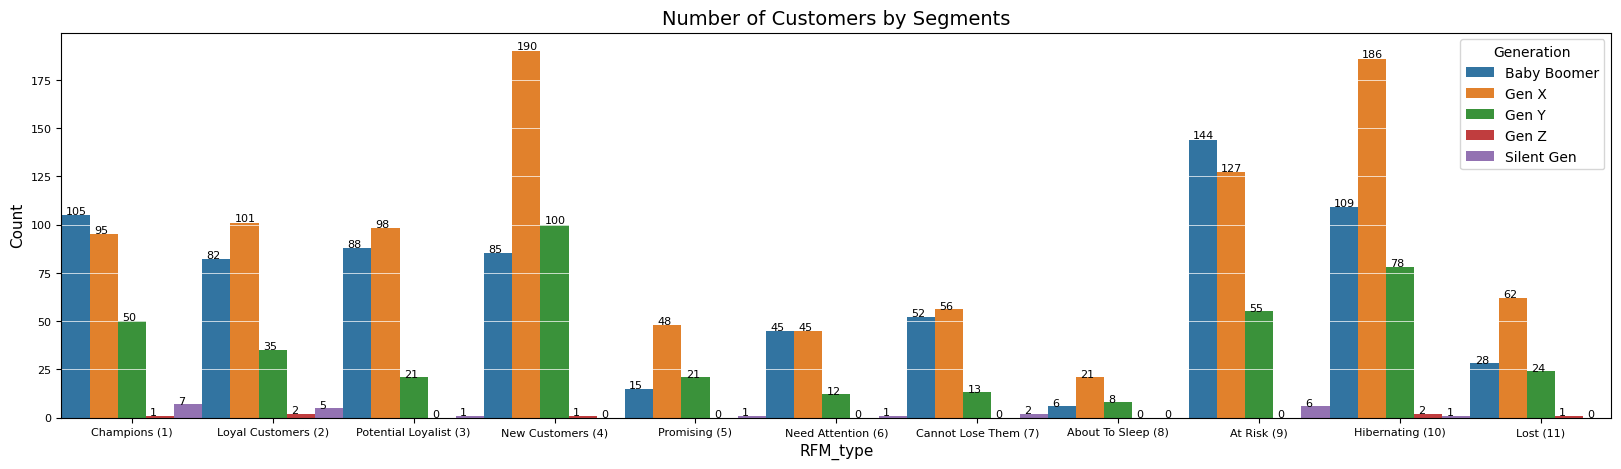

In [153]:
order = ['Champions (1)','Loyal Customers (2)','Potential Loyalist (3)','New Customers (4)','Promising (5)','Need Attention (6)','Cannot Lose Them (7)','About To Sleep (8)','At Risk (9)','Hibernating (10)','Lost (11)']

#create frame
plt.figure(figsize=(20,8))
fig, ax = plt.subplots(figsize=(20,5))

#create chart
ax.grid(lw=0.5,color="white");
bar_ap = sns.countplot(data = customer_df, x = 'RFM_type', order = order, hue = 'Generation', width=1)
total = len(customer_df['RFM_type'])
for patch in ax.patches:
    percentage = '{:.0f}'.format(patch.get_height())
    x = patch.get_x() + patch.get_width() / 2 - 0.07
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 8)

#edit x,y,title
bar_ap.set_xticklabels(bar_ap.get_xticklabels()); #, rotation=90
plt.title('Number of Customers by Segments', size = 14); #, color=text_color
plt.ylabel('Count', size = 11,color="black")
plt.xlabel("RFM_type",fontsize = 11,color="black")
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.show()

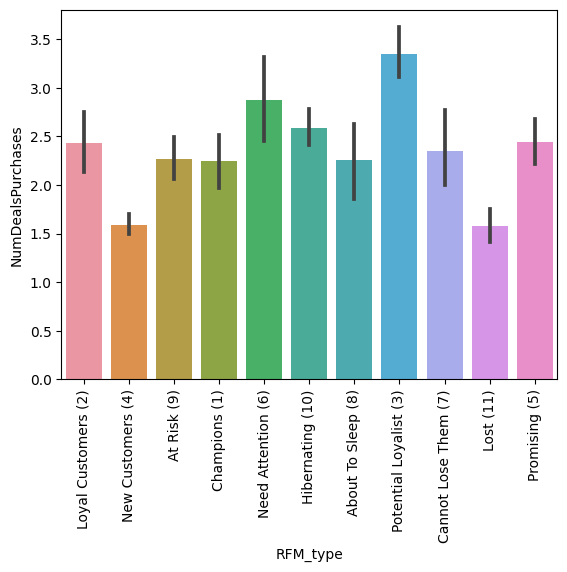

In [103]:
rfm_deal = customer_df.loc[:,['RFM_type', 'NumDealsPurchases', 'Dt_Customer']]

rfm_deal = sns.barplot(data = customer_df, x = 'RFM_type', y = 'NumDealsPurchases')
rfm_deal.set_xticklabels(rfm_deal.get_xticklabels(), rotation=90);

<Axes: xlabel='Generation', ylabel='RFM_type'>

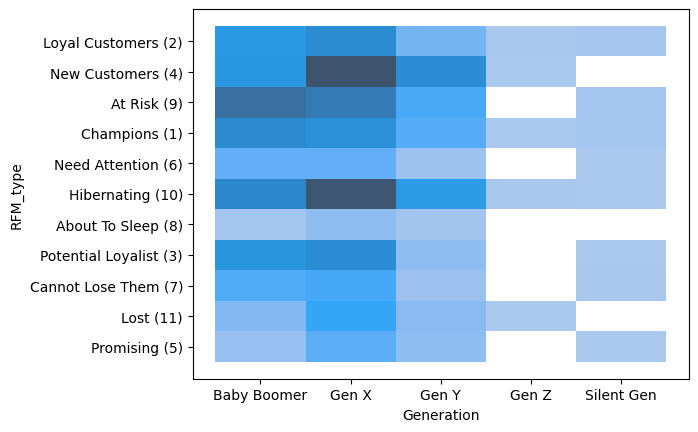

In [129]:
sns.histplot(data = customer_df, x = 'Generation', y = 'RFM_type')

- In general, the main consumers of this shop are Baby Boomer, Gen X and Gen Y. 
- The percentage of 'New Customers', 'Hibernating' were equivalent in Gen X (the main customer of this supermarket in 2 recored years)

In [163]:
hibernating_customers = customer_df[customer_df['RFM_type'] == 'Hibernating (10)']
c = hibernating_customers.loc[:,['RFM_type', 'Generation','Total_Accepted', 'NumDealsPurchases','#Family_Member', 'Spend/Income(%)']]

c[c['Generation'] == 'Gen X'].value_counts().to_frame()

0
RFM_type         Generation Total_Accepted NumDealsPurchases #Family_Member Spend/Income(%)   
Hibernating (10) Gen X      0              1                 2              0.18             3
                                           4                 3              0.26             3
                                           2                 2              0.23             3
                                           1                 2              0.37             2
                                                                            0.22             2
...                                                                                         ..
                                           2                 2              0.30             1
                                                                            0.29             1
                                                                            0.28             1
                                                                            0.21             1
                            2              6                 3              0.56             1

[153 rows x 1 columns]